# Analysis for g-BC3

## Electronic density versus energy

In the file `SUMMARY.fcc`

+ The 1st column: lattice parameter (in Å units)
+ The 2nd column: unit number (always 1 in this case)
+ The 3rd column: free energy (in eV units)
+ The 4th column: initial energy (in eV units)
+ The 5th column: energy change (difference between initial and current energy, in eV units)

In [4]:
# Import the necessary packages
import xml.etree.ElementTree as ET

# Analysis vasprun.xml file
tree = ET.parse('BC3_DOS_with_relax/vasprun.xml')
root = tree.getroot()

# Extract Fermi energy
efermi = float(root.find(".//i[@name='efermi']").text)

# Extract Energies Total DOS Integrated DOS
energies_list, total_dos_list, integrated_dos_list = [], [], []

for r_element in root.findall(".//set[@comment='spin 1']/r"):
    values = list(map(float, r_element.text.split()))
    energies = values[0]
    energies_list.append(energies)
    total_dos = values[1]
    total_dos_list.append(total_dos)
    integrated_dos = values[2]
    integrated_dos_list.append(integrated_dos)

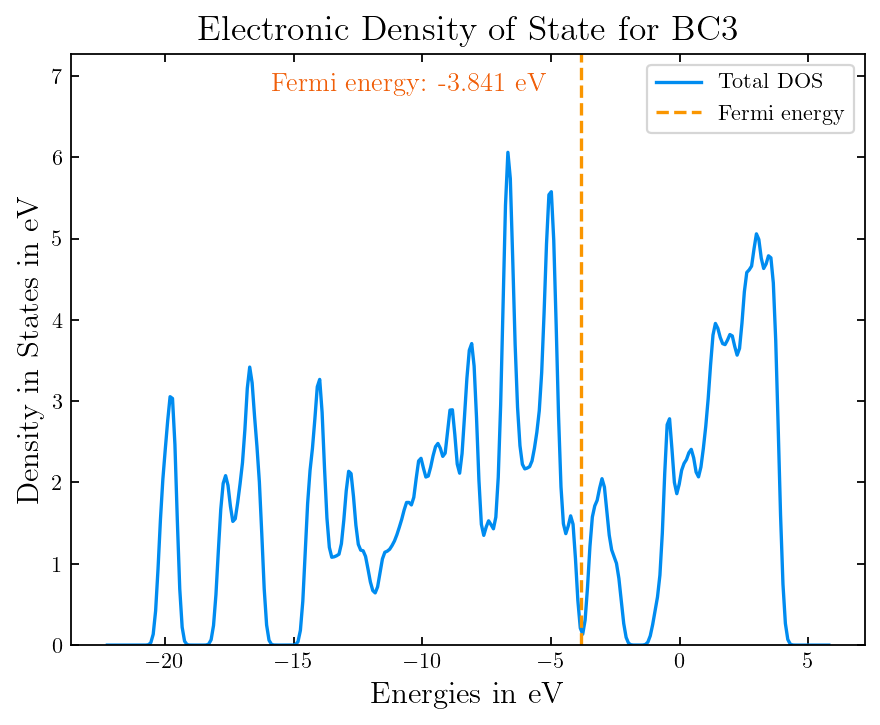

In [5]:
import matplotlib.pyplot as plt

# Set up the specified style parameters
plt.figure(dpi=160, figsize=(6.4,4.8))
params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
plt.rcParams.update(params)
plt.tick_params(direction="in", which="both", top=True, right=True, bottom=True, left=True)

plt.title("Electronic Density of State for BC3"); plt.xlabel(r"Energies in eV"); plt.ylabel(r"Density in States in eV")
plt.plot(energies_list[0:300], total_dos_list[0:300], c="#008CF0", label="Total DOS")
# plt.plot(energies_list[0:300], integrated_dos_list[0:300], c="#8C64F0", label="Integrated DOS")
# y_axis_top = max(integrated_dos_list[0:300])
y_axis_top = max(total_dos_list[0:300])

# Plot Fermi energy as a vertical line
plt.axvline(x=efermi, linestyle="--", color="#FA9600", label="Fermi energy")

# Add Fermi energy value to the plot
fermi_energy_text = f"Fermi energy: {efermi:.3f} eV"
plt.text(efermi-12, y_axis_top*1.125, fermi_energy_text, fontsize=12, color="#F05F0A", rotation=0)

plt.ylim(0, y_axis_top*1.2)
# plt.xlim(-6, 6)
plt.legend(loc="best")
plt.show()

## Bandstructure

The band structure is demonstrated with Energy (in eV) versus K-point distance (in Å).

/home/lu/.local/lib/python3.11/site-packages/pymatgen/io/vasp/inputs.py:1837: UserWarning: POTCAR with symbol B and functional
PBE has a SHA256 hash defined,
but the computed hash differs.
YOUR POTCAR FILE HAS BEEN CORRUPTED AND SHOULD NOT BE USED!
  warnings.warn(
/home/lu/.local/lib/python3.11/site-packages/pymatgen/io/vasp/inputs.py:1837: UserWarning: POTCAR with symbol C and functional
PBE has a SHA256 hash defined,
but the computed hash differs.
YOUR POTCAR FILE HAS BEEN CORRUPTED AND SHOULD NOT BE USED!
  warnings.warn(


figure numbers: []


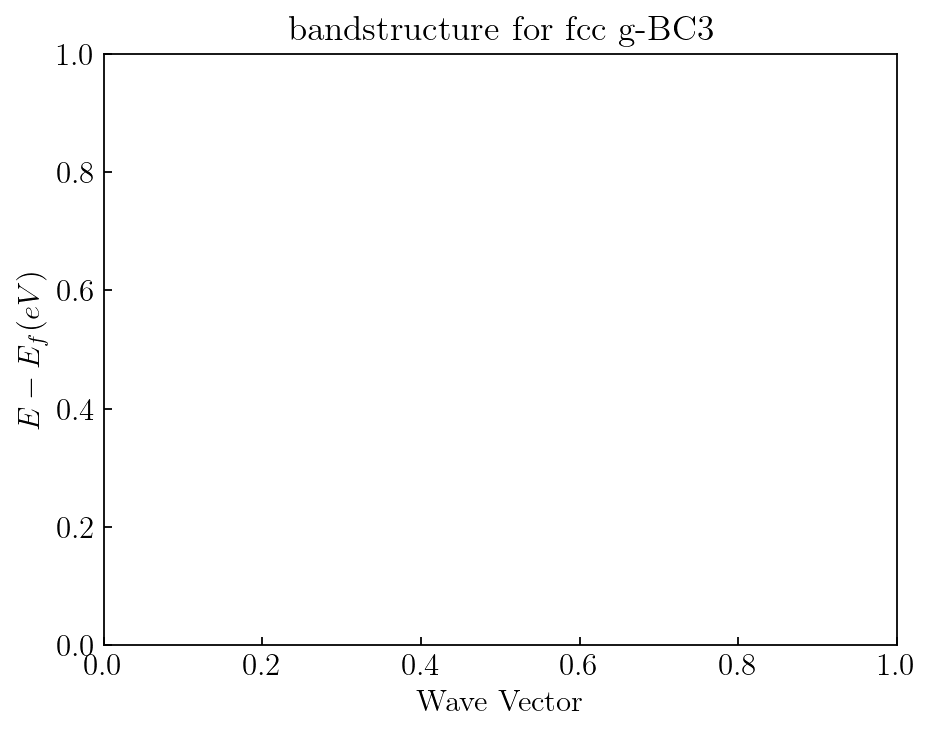

In [1]:
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.io.vasp import Vasprun

# Extract the band structure data from the vasprun.xml file
vasprun = Vasprun("BC3_bandstructure/vasprun.xml")
band_structure = vasprun.get_band_structure(line_mode=False) # Save file 

# Use pymatgen's BSPlotter tool to create the band structure plot
plotter = BSPlotter(band_structure)
# plotter.get_plot(ylim=(-20, 40))

# print(electronic_structure.bandstructure.BandStructure.bands)

print("figure numbers:",plt.get_fignums())

params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
plt.rcParams.update(params)

ax = plt.gca()
ax.figure.set_dpi(160)
ax.figure.set_size_inches(6.4,4.8)
ax.set_title("bandstructure for fcc g-BC3",fontsize=params['axes.titlesize'])
ax.set_xlabel('Wave Vector', fontsize=params['axes.labelsize'])
ax.set_ylabel('$E-E_f{\mathrm (eV)}$', fontsize=params['axes.labelsize'])
ax.tick_params(axis='both', labelsize=params['axes.labelsize'],direction='in')